In [ ]:
pip install gym

TASK 1:


In [2]:

#Task 1
import numpy as np
import gym
import random
env = gym.make('Taxi-v3')
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))
print(Q)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
learning_rate = 0.1
discount_factor = 0.99
num_episodes = 10000
max_steps_per_episode = 100
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01


In [4]:
for episode in range(num_episodes):
    state = env.reset()
    done = False
    for step in range(max_steps_per_episode):

        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, done, _ = env.step(action)

        Q[state, action] = Q[state, action] + learning_rate * (
            reward + discount_factor * np.max(Q[next_state, :]) - Q[state, action]
        )

        state = next_state

        if done:
            break

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
total_rewards = 0
num_episodes_eval = 1000

for episode in range(num_episodes_eval):
    state = env.reset()
    done = False

    for step in range(max_steps_per_episode):
        action = np.argmax(Q[state, :])
        next_state, reward, done, _ = env.step(action)

        total_rewards += reward

        state = next_state

        if done:
            break



/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
avg_reward = total_rewards / num_episodes_eval
print("Average reward:", avg_reward)

# Close the environment
env.close()

Average reward: 7.942


In [6]:
env.reset()

for episode in range(10):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps_per_episode):

        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state,:])

        new_state, reward, done, info = env.step(action)

        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            #env.render()
            if new_state == 15:
                print("We reached our Goal 🏆")
            else:
                print("We fell into a hole ☠️")

            # We print the number of step it took.
            print("Number of steps", step)

            break
        state = new_state
env.close()

****************************************************
EPISODE  0
We fell into a hole ☠️
Number of steps 9
****************************************************
EPISODE  1
We fell into a hole ☠️
Number of steps 9
****************************************************
EPISODE  2
We fell into a hole ☠️
Number of steps 10
****************************************************
EPISODE  3
We fell into a hole ☠️
Number of steps 12
****************************************************
EPISODE  4
We fell into a hole ☠️
Number of steps 11
****************************************************
EPISODE  5
We fell into a hole ☠️
Number of steps 13
****************************************************
EPISODE  6
We fell into a hole ☠️
Number of steps 13
****************************************************
EPISODE  7
We fell into a hole ☠️
Number of steps 14
****************************************************
EPISODE  8
We fell into a hole ☠️
Number of steps 13
************************************************

Action space: Discrete(6)


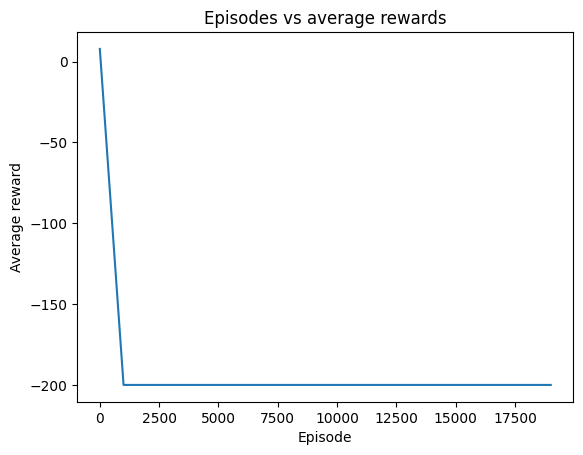

In [8]:
import random

import gym
import numpy as np
import matplotlib.pyplot as plt


env = gym.make('Taxi-v3')
print("Action space:", env.action_space)
state_size = 16
action_space = env.action_space.n
alpha = 0.5
gamma = 0.7
state_action_vals = np.random.randn(state_size, action_space)
policy = np.zeros(state_size, dtype=int)
episodes = 20000
eps = 1
test_episodes = 50
test_every = 1000
test_episode = []
rewards = []
def select_action(state, eps):
    sample = np.random.uniform()
    if sample < eps:
        return env.action_space.sample()
    else:
        return state_action_vals[state].argmax()
for ep in range(episodes):
    state = env.reset()
    action = select_action(state, eps)
    done = False
    while not done:
        next_state, reward, done, _ = env.step(action)
        next_action = select_action(next_state, eps)

        action_value = Q[state, action]
        next_action_value = Q[next_state, next_action]
        delta = reward + gamma * next_action_value - action_value
        Q[state, action] += alpha * delta
        state, action = next_state, next_action

    if ep % test_every == 0:
        total_rewards = 0
        for _ in range(test_episodes):
            done = False
            state = env.reset()
            while not done:
                action = np.argmax(Q[state])
                state, reward, done, _ = env.step(action)
                total_rewards += reward
        rewards.append(total_rewards / test_episodes)
        test_episode.append(ep)

fig, ax = plt.subplots()
ax.plot(test_episode, rewards)
ax.set_title('Episodes vs average rewards')
ax.set_xlabel('Episode')
_ = ax.set_ylabel('Average reward')

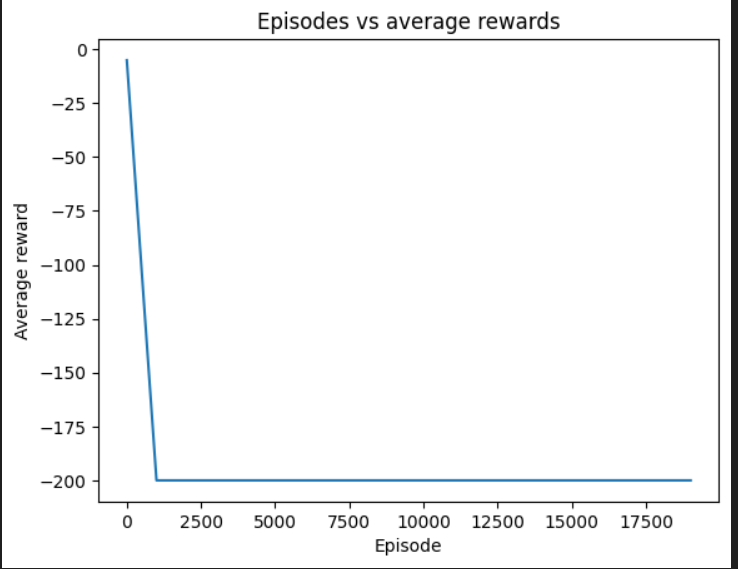

TASK 2:


In [9]:
#Task 2

env = gym.make('Taxi-v3')
num_passenger_states = 5
num_destination_states = 4
num_actions = env.action_space.n
print(num_actions)
REWARD_SUCCESSFUL_DROP_OFF = 20  # High positive reward for successful drop-off
REWARD_WRONG_DROP_OFF = -10  # Penalty for trying to drop off at wrong locations
REWARD_NOT_AT_DESTINATION = -1  # Slight negative reward for not reaching destination at each time step

state = env.reset()
done = False
total_reward = 0

while not done:
    # Sample a random action
    action = env.action_space.sample()

    # Take the action and observe the next state, reward, and done flag
    next_state, reward, done, _ = env.step(action)

    # Update total reward
    total_reward += reward

    # Custom reward handling based on the environment specifications
    if reward == REWARD_SUCCESSFUL_DROP_OFF:
        print("Successful drop-off!")
    elif reward == REWARD_WRONG_DROP_OFF:
        print("Wrong drop-off location! Penalty applied.")
    elif reward == REWARD_NOT_AT_DESTINATION:
        print("Not at destination yet.")

    # Print the current state and action
    print("Current state:", state)
    print("Action taken:", action)

    # Update the state for the next iteration
    state = next_state

# Print the total reward obtained in the episode
print("Total reward in this episode:", total_reward)

# Close the environment
env.close()

6
Not at destination yet.
Current state: 362
Action taken: 2
Not at destination yet.
Current state: 382
Action taken: 2
Wrong drop-off location! Penalty applied.
Current state: 382
Action taken: 4
Not at destination yet.
Current state: 382
Action taken: 1
Wrong drop-off location! Penalty applied.
Current state: 282
Action taken: 5
Not at destination yet.
Current state: 282
Action taken: 0
Not at destination yet.
Current state: 382
Action taken: 2
Not at destination yet.
Current state: 382
Action taken: 2
Not at destination yet.
Current state: 382
Action taken: 3
Not at destination yet.
Current state: 362
Action taken: 3
Wrong drop-off location! Penalty applied.
Current state: 362
Action taken: 4
Not at destination yet.
Current state: 362
Action taken: 2
Wrong drop-off location! Penalty applied.
Current state: 382
Action taken: 4
Wrong drop-off location! Penalty applied.
Current state: 382
Action taken: 5
Not at destination yet.
Current state: 382
Action taken: 1
Wrong drop-off location

In [ ]:
import numpy as np

num_devices = 10  # Number of AI devices
num_actions = 2  # Number of possible actions (transmit directly or forward)

energy_levels = np.ones(num_devices)  # Initial energy levels of devices

def step(state, action):
    # Perform action and update energy levels
    # Calculate reward based on energy consumption and data transmission quality
    next_state = get_next_state(state, action)
    reward = calculate_reward(state, action, next_state)
    # Update energy levels based on actions taken
    update_energy_levels(action)
    return next_state, reward

def calculate_reward(state, action, next_state):
    # Example: Calculate reward based on the distance between current state and next state
    # Here, we can use a simple reward function where the reward is inversely proportional to the distance
    distance = abs(next_state - state)
    if distance == 0:
        # If the next state is the same as the current state, return a negative reward
        return -1
    else:
        # Otherwise, return a positive reward inversely proportional to the distance
        return 1 / distance

def update_energy_levels(action):
    # Update energy levels based on actions taken
    global energy_levels
    # Placeholder implementation for now
    if action == 0:  # Transmit directly
        energy_levels -= 0.1  # Example: Decrease energy levels for all devices when transmitting directly
    elif action == 1:  # Forward to the next device
        energy_levels[0] -= 0.1  # Example: Decrease energy level of the first device when forwarding
    else:
        raise ValueError("Invalid action")

def get_next_state(state, action):
    # Determine next state based on current state and action taken
    # For simplicity, let's assume the next state is determined by the action
    # This can be replaced with more complex logic based on your problem domain
    if action == 0:  # Transmit directly
        return state
    elif action == 1:  # Forward to the next device
        return (state + 1) % num_devices  # Wrap around to the first device if reaching the last one
    else:
        raise ValueError("Invalid action")

# Define the reinforcement learning algorithm

Q = np.zeros((num_devices, num_actions))  # Q-table
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon for epsilon-greedy policy

def select_action(state):
    # Epsilon-greedy action selection
    if np.random.rand() < epsilon:
        return np.random.choice(num_actions)  # Explore
    else:
        # Exploit: Choose action with the highest Q-value for the current state
        max_Q_value = float("-inf")
        best_action = None
        for a in range(num_actions):
            if Q[state, a] > max_Q_value:
                max_Q_value = Q[state, a]
                best_action = a
        return best_action

def update_Q(state, action, reward, next_state):
    if state is None or reward is None:
        return  # Skip update if state or reward is None

    # Ensure that state is within the valid range
    if 0 <= state < num_devices:
        # Q-learning update rule
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
    else:
        # Handle the case when state is out of bounds
        print("Invalid state:", state)
# Main training loop

num_episodes = 1000

for episode in range(num_episodes):
    state = np.random.randint(0, num_devices)  # Random initial state
    done = False
    total_reward = 0

    while not done:
        action = select_action(state)
        next_state, reward = step(int(state), action)  # Convert state to integer
        update_Q(int(state), action, reward, next_state)  # Convert state to integer
        if reward is not None:
            total_reward += reward
        state = next_state

    print("Episode:", episode, "Total reward:", total_reward)
    print("Q-values after episode:", episode)
    print(Q)
